Tasks (FILIP)

- Put into Notebook format
- Copy text from latex into notebook
- Discuss runtimes of different methods
- Insert (3) and (4).

Mean:  33.135
Std:  32.82726877155637
[0.15089237 0.15359654 0.14061655 0.15089237 0.13899405 0.26500811]
chisq:  (0.20710051773790206, 0.9990355370127559)

Mean:  2.7123
Std:  2.1620658431231923
[0.38453522 0.24270529 0.15548145 0.09253856 0.062005   0.06273447]
chisq:  (0.9378261642940757, 0.9674230403213899)

Mean:  1.1737
Std:  0.4504756486204332
[8.518e-01 1.265e-01 1.830e-02 3.000e-03 4.000e-04 0.000e+00]
chisq:  (4.131736148571427, 0.5306094261445626)

5
2
6.0
Mean:  4.1157
Std:  1.8370937673401433
[0.1481 0.1028 0.1204 0.0616 0.2482 0.3189]
chisq:  (0.000379433142857144, 0.9999999998508483)

Mean:  4.1038
Std:  1.822971628961899
[0.1433 0.1058 0.1263 0.0646 0.2484 0.3116]
chisq:  (0.00016653028571428585, 0.9999999999809649)

Mean:  4.11
Std:  1.8190931806809678
[0.1412 0.1067 0.1282 0.0588 0.255  0.3101]
chisq:  (0.0006282102857142878, 0.9999999994739658)

0.027783416997408494
0.048607417003950104
0.032306791021255776
0.005444042006274685
0.015372791996924207
0.0073406670126132

(array([0.1412, 0.1067, 0.1282, 0.0588, 0.255 , 0.3101]),
 array([1., 2., 3., 4., 5., 6., 7.]),
 [<matplotlib.patches.Polygon at 0x165d9bfd0>])

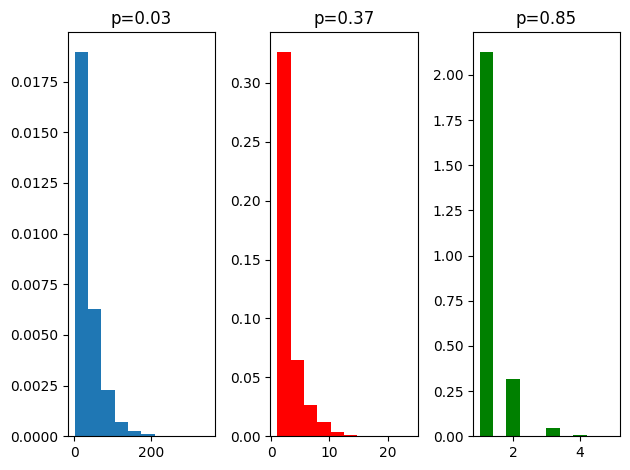

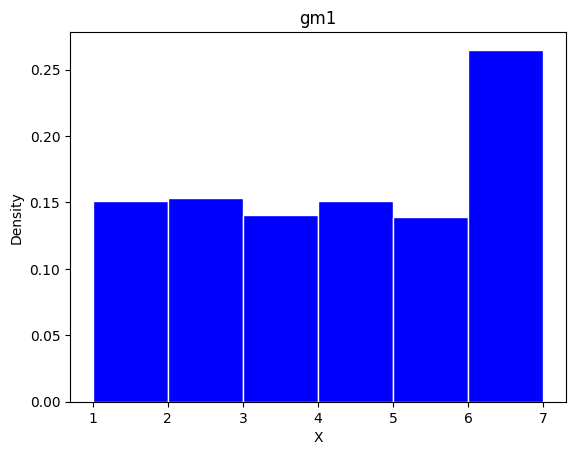

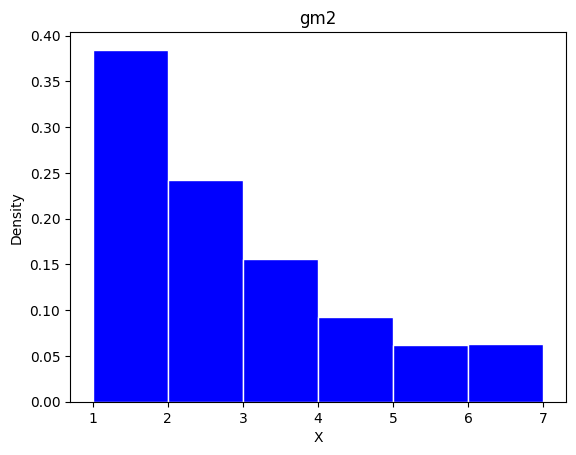

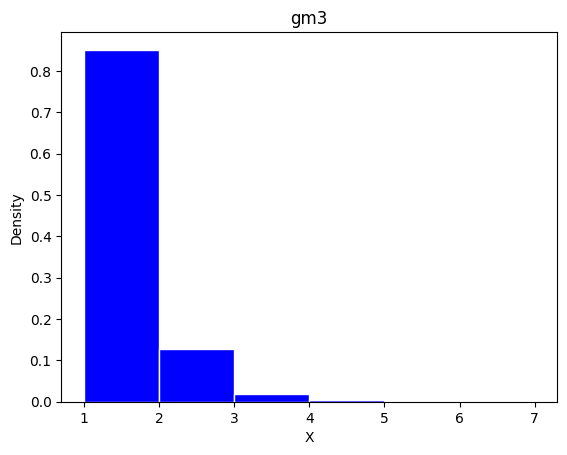

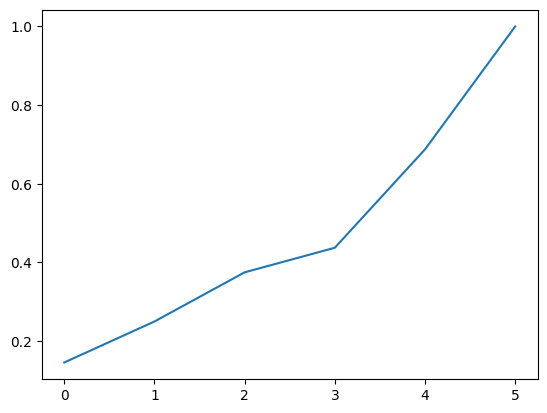

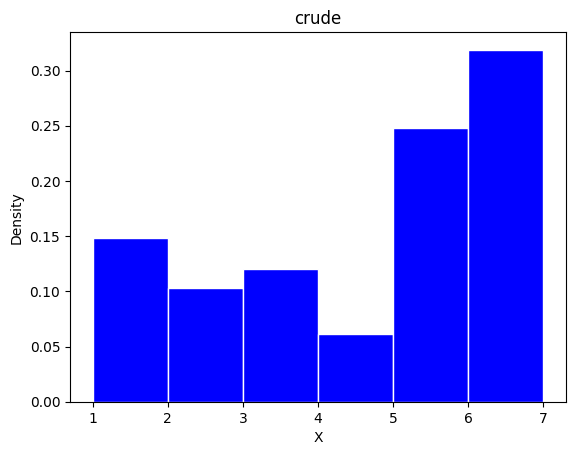

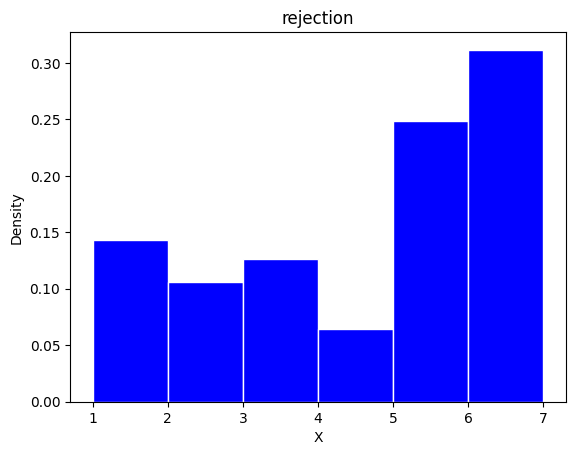

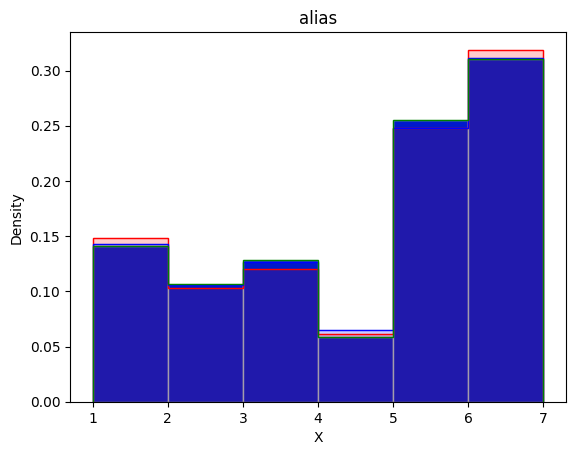

In [1]:
"""
@author: filip
"""

import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as scs
import timeit

import numpy as np
p1,p2,p3=0.03,0.37,0.85

gm1= np.random.geometric(p1,10000)
gm2= np.random.geometric(p2,10000)
gm3=np.random.geometric(p3,10000)


#plt.plot(np.sort(gm3))
#Histograms
plt.figure()
plt.subplot(1, 3, 1)
plt.hist(gm1,density=True)
plt.title("p=0.03")
plt.subplot(1, 3, 2)
plt.hist(gm2,density=True,color='red')
plt.title("p=0.37")
plt.subplot(1, 3, 3)
plt.hist(gm3,density=True,color='green')
plt.title("p=0.85")
plt.tight_layout()





p = np.array([7/48,5/48,1/8,1/16,1/4,5/16])
pa = np.cumsum(p)
k=6

def stats(Y,name):
    plot =plt.figure()
    a = plt.hist(Y,bins=[1,2,3,4,5,6,7],density=1,rwidth=1,edgecolor='white',color='blue')
    plt.title(name)
    plt.xlabel("X")
    plt.ylabel("Density")
    #plot.savefig(r"C:\Users\Spil\OneDrive\Documents\DTU_kandidat\2. semester\Stochastic simulation\1_2ali_hist")
    print("Mean: ",np.mean(Y))
    print("Std: ", np.std(Y))
    print(a[0])
    print("chisq: ", scs.chisquare(a[0],p)[0:2])
    print()
    return


stats(gm1,'gm1')
stats(gm2,'gm2')
stats(gm3,'gm3')



plt.figure()
plt.plot(pa)


k = 6
"""CRUDE METHOD"""
#setup

#X=-1

def crude():
    U = np.random.random(1)
    for i in range(6):
        if U < pa[i]:
            return i+1
    return "error"
print(crude())


#For a list (more efficient)
def ncrude(nn):
    ss = np.zeros(nn)
    p = np.array([7/48,5/48,1/8,1/16,1/4,5/16])
    pa = np.cumsum(p)
    U = np.random.random(nn)
    for j in range(nn):
        for i in range(6):
            if U[j] < pa[i]:
                ss[j] = i+1
                break
    return ss
ncrude(10)



"""REJECTION METHOD"""
#setup

#method
def rejection():
    q = 1/k
    c = max(p)/q
    while(1):
        U1 = np.random.random(1)
        Y = int(k*U1)+1
        U2 = np.random.random(1)
        if U2 <= p[Y-1]/(c*q):
            Xr = Y
            return Xr
    return "error"
print(rejection())


#For a list (more efficient)
def nrejection(nn):
    q = 1/k
    c = max(p)/q
    ss = np.zeros(nn)
    U1 = np.random.random(nn)
    U2 = np.random.random(nn)
    for j in range(nn):
        while(ss[j]==0):
            Y = int(k*U1[j])+1
            if U2[j] <= p[Y-1]/(c*q):
                ss[j] = Y
                break
            else:
                U1[j],U2[j] = np.random.random(2)
    return ss
nrejection(10)




"""Alias METHOD"""
#Setup for alias using pseudo-code from slides
L=np.ones(k)*range(k)
F=k*p
G = np.where(F>=1)[0]
S = np.where(F<=1)[0]
while np.size(S)>0:
    i = G[0]
    j = S[0]
    L[j] = i+1
    F[i] = F[i] - (1 - F[j])
    
    if F[i] < 1-0.000001:
        G = np.delete(G,0)
        S = np.append(S,i)
    S = np.delete(S,0)


def alias():
    UA1 = np.random.random(1)
    UA2 = np.random.random(1)
    I = int(np.floor(k*UA1) + 1)
    #print(UA1,UA2,I)
    if UA2 <= F[I-1]:
        return I
    else:
        return L[I-1]
    
print(alias())

#For a list (more efficient)
def nalias(nn):
    ss = np.zeros(nn)
    UA1 = np.random.random(nn)
    UA2 = np.random.random(nn)
    for j in range(nn):
        I = int(np.floor(k*UA1[j]) + 1)
        #print(UA1,UA2,I)
        if UA2[j] <= F[I-1]:
            ss[j] = I
        else:
            ss[j] = L[I-1]
    return ss

nalias(10000)
        


"""Plots and stats for methods"""
crX = np.zeros(10000)
start1 = timeit.default_timer()
for i in range(10000):
    crX[i] = crude()
stop1 = timeit.default_timer()
stats(crX,'crude')
#


reX = np.zeros(10000)
start2 = timeit.default_timer()
for i in range(10000):
    reX[i] = rejection()
stop2 = timeit.default_timer()
stats(reX,'rejection')


alX = np.zeros(10000)
start3 = timeit.default_timer()
for i in range(10000):
    alX[i] = alias()
stop3 = timeit.default_timer()
stats(alX,'alias')


print(stop1-start1)
print(stop2-start2)
print(stop3-start3)



#efficient list methods
start1 = timeit.default_timer()
tt1 = ncrude(10000)
stop1 = timeit.default_timer()

start2 = timeit.default_timer()
tt2 = nrejection(10000)
stop2 = timeit.default_timer()

start3 = timeit.default_timer()
tt2 = nalias(10000)
stop3 = timeit.default_timer()
print(stop1-start1)
print(stop2-start2)
print(stop3-start3)



plt.hist([crX],bins=[1,2,3,4,5,6,7],density=1,rwidth=1,edgecolor='red',color='red',alpha=1,histtype='step')
plt.hist([reX],bins=[1,2,3,4,5,6,7],density=1,rwidth=1,edgecolor='blue',color='blue',alpha=1,histtype='step')
plt.hist([alX],bins=[1,2,3,4,5,6,7],density=1,rwidth=1,edgecolor='green',color='green',alpha=1,histtype='step')

plt.hist([crX],bins=[1,2,3,4,5,6,7],density=1,rwidth=1,edgecolor='red',color='red',alpha=0.2,histtype='stepfilled')
plt.hist([reX],bins=[1,2,3,4,5,6,7],density=1,rwidth=1,edgecolor='blue',color='blue',alpha=0.2,histtype='stepfilled')
plt.hist([alX],bins=[1,2,3,4,5,6,7],density=1,rwidth=1,edgecolor='green',color='green',alpha=0.2,histtype='stepfilled')


#plt.hist(reX,bins=6,density=1,rwidth=1,edgecolor='white',color='blue')

#aaaa = plt.hist(reX,bins=[1,2,3,4,5,6,7],density=1,rwidth=1,edgecolor='white',color='blue')


#plt.plot(- np.log(np.random.random(100))/1)





